In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from math import log

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from scipy.stats import norm
import sklearn.feature_selection as fs
from sklearn import datasets
import pprint
import statsmodels.api as sm 
from scipy.stats import skew, skewtest
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression

In [19]:
train_df1 = pd.read_csv("final_total_data.csv")

In [13]:
train_df1.shape

(2919, 59)

In [28]:
test1.sample(3)

,Unnamed: 0,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,...,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms
2562,1102,0,3,5,5.0,1.0,1,1,5.0,Y,...,Gable,Normal,NaN,WD,0,686.0,0,92,2,1
2751,1291,0,3,5,5.0,1.0,1,1,5.0,Y,...,Hip,Abnorml,NaN,COD,0,929.0,0,77,3,3
983,983,0,4,5,5.0,2.0,1,1,7.0,Y,...,Gable,Normal,255900.0,WD,0,1128.0,0,16,4,3


In [32]:
test1.columns

Index(['OverallQual', 'GarageCars', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'BathRooms', 'Fireplaces', 'LotArea', 'Neighborhood', 'BedroomAbvGr',
       'MSSubClass', 'OverallCond', 'BldgType', 'BsmtFinType1', 'FireplaceQu',
       'NonKitchenBedroomAbvGr', 'GarageFinish', 'GarageQual', 'KitchenAbvGr',
       'BsmtExposure', 'LotShape', 'BsmtFinType2', 'ExterCond', 'MoSold',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exteri

In [33]:
trialbest.columns

Index(['OverallQual', 'GarageCars', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'BathRooms', 'Fireplaces', 'LotArea', 'Neighborhood', 'BedroomAbvGr',
       'MSSubClass', 'OverallCond', 'BldgType', 'BsmtFinType1', 'FireplaceQu',
       'NonKitchenBedroomAbvGr', 'GarageFinish', 'GarageQual', 'KitchenAbvGr',
       'BsmtExposure', 'LotShape', 'BsmtFinType2', 'ExterCond', 'MoSold',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior

In [29]:
trialbest.sample(3)

,OverallQual,GarageCars,ExterQual,KitchenQual,BsmtQual,BathRooms,Fireplaces,LotArea,Neighborhood,BedroomAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
128,6,2.0,5,5.0,5.0,2,1,7590,11,3,...,0,0,0,0,0,1,0,0,0,1
1379,5,2.0,5,7.0,7.0,3,0,9735,22,3,...,0,0,0,0,0,1,0,0,0,1
946,5,1.0,5,5.0,5.0,2,1,8163,11,3,...,0,0,0,0,0,1,0,0,0,1


In [30]:
trialbest.shape

(1460, 91)

In [31]:
test1.shape

(1459, 88)

In [ ]:
test1

In [20]:
trial2 = train_df1[:1460]

In [21]:
test1 = train_df1[1460:]

In [7]:
test1 = test1[['OverallQual',"GarageCars","ExterQual","KitchenQual","BsmtQual","BathRooms",
                 "Fireplaces","LotArea","Neighborhood","BedroomAbvGr","MSSubClass","MSZoning",
                "Foundation","OverallCond","GarageType","BldgType","BsmtFinType1","HouseStyle",
                "FireplaceQu","NonKitchenBedroomAbvGr","Exterior1st","GarageFinish","GarageQual",
                "KitchenAbvGr","LandContour","MasVnrType","SaleCondition","BsmtExposure","LotShape",
                "Condition1","BsmtFinType2","ExterCond","SaleType","MoSold","LotConfig"]]

In [23]:
test1.shape

(1459, 35)

In [8]:
test1 = pd.get_dummies(columns=["GarageType","Foundation",
                                 "MSZoning","HouseStyle", 
                                 "Exterior1st","LandContour",
                                "MasVnrType","SaleCondition",
                                "Condition1","SaleType","LotConfig"],data = test1, drop_first = True)

In [26]:
test1.shape

(1459, 88)

In [12]:
trialbest.sample(3)

,OverallQual,GarageCars,ExterQual,KitchenQual,BsmtQual,BathRooms,Fireplaces,LotArea,Neighborhood,BedroomAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
25,8,3.0,7,7.0,7.0,2,1,14230,24,3,...,0,0,0,0,0,1,0,0,0,0
1162,5,2.0,5,5.0,7.0,1,1,8724,7,3,...,0,0,0,0,0,1,0,0,0,1
63,7,2.0,5,5.0,5.0,2,0,10300,6,3,...,0,0,0,0,0,1,0,0,0,1


In [22]:
trial2['logSalePrice'] = trial2['SalePrice'].apply(lambda x: log(x))

/Users/twaterman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
y = trial2['logSalePrice']

In [24]:
trialbest = trial2[['OverallQual',"GarageCars","ExterQual","KitchenQual","BsmtQual","BathRooms",
                 "Fireplaces","LotArea","Neighborhood","BedroomAbvGr","MSSubClass","MSZoning",
                "Foundation","OverallCond","GarageType","BldgType","BsmtFinType1","HouseStyle",
                "FireplaceQu","NonKitchenBedroomAbvGr","Exterior1st","GarageFinish","GarageQual",
                "KitchenAbvGr","LandContour","MasVnrType","SaleCondition","BsmtExposure","LotShape",
                "Condition1","BsmtFinType2","ExterCond","SaleType","MoSold","LotConfig"]]

In [25]:
trialbest = pd.get_dummies(columns=["GarageType","Foundation",
                                 "MSZoning","HouseStyle", 
                                 "Exterior1st","LandContour",
                                "MasVnrType","SaleCondition",
                                "Condition1","SaleType","LotConfig"],data = trialbest, drop_first = True)

In [10]:
trialbest.shape

(1460, 91)

In [26]:
lm = LinearRegression()
lm.fit(trialbest, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lm.intercept_
lm.score(trialbest, y)
print('R^2 is equal to %.3f' %(lm.score(trialbest, y)))
print('RSS is equal to %.3f' %(np.sum((y-lm.predict(trialbest))**2)))
print('The intercept is %.3f' %(lm.intercept_))
#print('The slopes are %s' %(lm.coef_))
print('The RMSE are %s' %(np.sqrt(np.mean((y-lm.predict(trialbest))**2))))

R^2 is equal to 0.892
RSS is equal to 25.049
The intercept is 9.348
The RMSE are 0.13098457021138463


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [20]:
ridge.set_params(alpha=1.0)
ridge.fit(trialbest, y)
ridge.score(trialbest, y)

0.8914261062740355

In [28]:
predicted_values = lm.predict(trialbest)

In [31]:
predicted_values

array([12.3060489 , 12.27278229, 12.30460157, ..., 12.50845324,
       11.83431428, 11.78618659])

In [32]:
residuals = (y - predicted_values)

In [34]:
residuals.mean()

-1.4174354232200628e-15

In [ ]:
#Lasso
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', max_iter=15000).fit(, y)
#res = rmse_cv(model_lasso)
#print("Mean:",res.mean())
#print("Min: ",res.min())

In [36]:
from sklearn import linear_model
ridge = linear_model.Ridge()

In [37]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(trialbest, y)
    coef.append(ridge.coef_)

In [46]:
coef[1][1]

0.06787933537420172

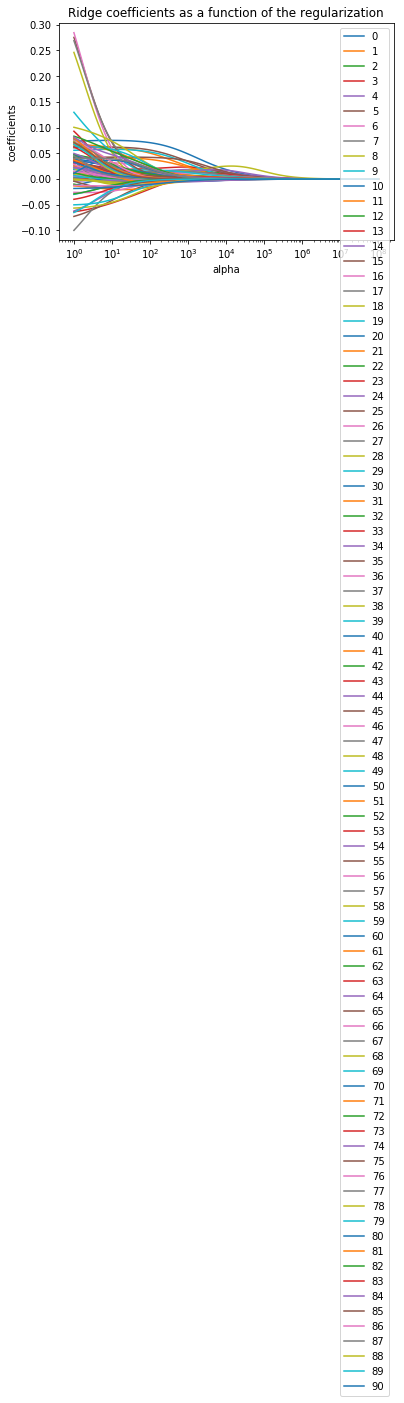

In [47]:
df_coef = pd.DataFrame(coef, index=alpha_100)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [60]:
lasso = linear_model.Lasso(alpha=.0000000000001, normalize=True) # create a lasso instance
lasso.fit(trialbest, y) # fit data
#lasso.coef_, lasso.intercept_ # print out the coefficients

print('The RMSE are %s' %(np.sqrt(np.mean((y-lasso.predict(trialbest))**2))))

The RMSE are 0.1309845702113859


/Users/twaterman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
#The RMSE are 0.13098457021138463

In [63]:
lasso = linear_model.Lasso(alpha=100) # create a lasso instance
lasso.fit(trialbest, y) # fit data
#lasso.coef_, lasso.intercept_ # print out the coefficients

print('The RMSE are %s' %(np.sqrt(np.mean((y-lasso.predict(trialbest))**2))))

The RMSE are 0.3859987537409439


In [62]:
ridge = linear_model.Ridge(alpha=.0000000001, normalize=True) # create a lasso instance
ridge.fit(trialbest, y) # fit data
#lasso.coef_, lasso.intercept_ # print out the coefficients

print('The RMSE are %s' %(np.sqrt(np.mean((y-ridge.predict(trialbest))**2))))

The RMSE are 0.1309845702113846
